# Cat vs Dog without using Keras

In [1]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
from random import shuffle
from tqdm import tqdm
import time
 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

# Importing and Prepping Data

In [2]:
Train_Dir = "Data/Dog_V_Cat/train"
Test_Dir  = "Data/Dof_V_Cat/test1"
Img_Size  = 64
ROWS = 64
COLS = 64
CHANNELS = 3

In [3]:
def sigmoid(z):
    A = 1 / (1 + np.exp(-z))
    return A

In [4]:
def label_img(img):
    #-3 because EX: dog.54.jpg
    #-3 is dog part
    label = img.split(".")[-3]
    if label == "dog": return 1
    if label == "cat": return 0 

In [5]:
def create_train_data():
    temp=0
    train_X  = np.ndarray((12288,25000), dtype=np.uint8)
    train_Y  = np.zeros((1,25000))
    for img in tqdm(os.listdir(Train_Dir)):
        label = label_img(img)
        path = os.path.join(Train_Dir,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (Img_Size,Img_Size),interpolation=cv2.INTER_CUBIC)
        train_X[:,temp]  = np.squeeze(img.reshape((12288,1)))
        train_Y[0][temp] = label
        temp = temp+1
        
    return train_X, train_Y

In [6]:
X, Y = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:52<00:00, 480.02it/s]


In [7]:
print(X.shape)
print(Y.shape)

(12288, 25000)
(1, 25000)


In [8]:
m  = len(X[0])
m1 = len(X)
print(m)
print(m1)
X_Train = np.zeros((m1,20000))
X_Test  = np.zeros((m1,5000))
Y_Train = np.zeros((1,20000))
Y_Test  = np.zeros((1,5000))

25000
12288


In [9]:
import random

In [10]:
r= list(range(m))
random.shuffle(r)

In [11]:
for i in range (m):
    temp=r[i]
    if (i<20000):
        Y_Train[0][i]= Y[0][temp]
        for p in range (m1):
            X_Train[p][i]= X[p][temp]
    elif (i >=20000):
        Y_Test[0][i-20000]= Y[0][temp]
        for p in range (m1):
            X_Test[p][i-20000]= X[p][temp]
        
    if i%5000 == 0 :
        print("Proceed {} of {}".format(i, m))
print("Done!")

Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
Done!


In [12]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(12288, 20000)
(12288, 5000)
(1, 20000)
(1, 5000)


In [13]:
X_Train = X_Train/255
X_Test  = X_Test/255
print(X_Train.shape)
print(X_Test.shape)

(12288, 20000)
(12288, 5000)


# Using Backpropagation

In [25]:
w= np.zeros((m1,1))
epoch=2500
b=0
alpha= .0017
J = np.zeros((epoch,1))
for i in range(epoch):
    z= np.dot(w.T,X_Train)+b
    A= sigmoid(z)
    dz= A-Y_Train
    dw= np.dot(X_Train,dz.T)/m1
    db=np.sum(dz)/m1
    w=w-(alpha*dw)
    b=b-(alpha*db)
    L= -(Y_Train*np.log(A)+(1-Y_Train)*np.log(1-A))
    J[i,0]= np.sum(L)/m1
    if i%500 == 0:
        print("Proceed {} of {}".format(i, epoch))
        print(J[i,0])

Proceed 0 of 2500
1.1281692391926192
Proceed 500 of 2500
1.0760505303240089
Proceed 1000 of 2500
1.065398551786481
Proceed 1500 of 2500
1.0578070345933888
Proceed 2000 of 2500
1.05152000116102


In [26]:
print(w)

[[ 6.83892875e-03]
 [ 7.11928117e-03]
 [-3.87003798e-05]
 ...
 [ 2.03201995e-03]
 [ 1.35360911e-02]
 [ 5.46386044e-03]]


Text(0.5, 0, 'Iteration')

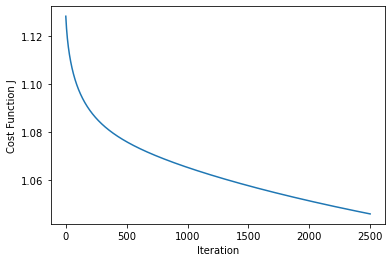

In [27]:
plt.plot(J)
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')

In [28]:
print("Train accuracy",np.mean(np.rint(A)==Y_Train)*100)
Z= np.dot(w.T, X_Test)+b
A= sigmoid(Z)
print("Test accuracy",np.mean(np.rint(A)==Y_Test)*100)

Train accuracy 63.565000000000005
Test accuracy 61.160000000000004


In [29]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

[[2.40639746]]
[[0.08268616]]
Prediction: DOG with probability [[91.73138431]]%


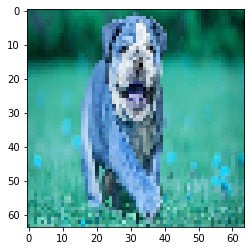

In [30]:
file = "Data/Dog_V_Cat/Internet/1.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = (np.dot(w.T, X_img) + b)
print(Z)
A = sigmoid(-Z)
print(A)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)

[[0.45676148]]
[[0.38775437]]
Prediction: DOG with probability [[61.22456293]]%


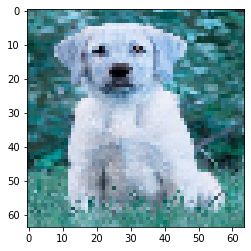

In [31]:
file = "Data/Dog_V_Cat/Internet/2.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = (np.dot(w.T, X_img) + b)
print(Z)
A = sigmoid(-Z)
print(A)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)

[[-0.44409418]]
[[0.60923416]]
Prediction: CAT with probability [[60.92341584]]%


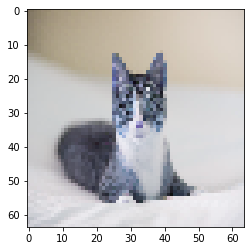

In [32]:
file = "Data/Dog_V_Cat/Internet/3.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = (np.dot(w.T, X_img) + b)
print(Z)
A = sigmoid(-Z)
print(A)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)

[[-0.4114064]]
[[0.60142506]]
Prediction: CAT with probability [[60.1425058]]%


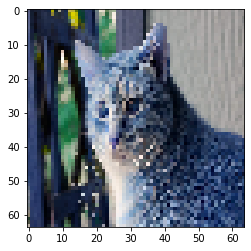

In [33]:
file = "Data/Dog_V_Cat/Internet/4.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = (np.dot(w.T, X_img) + b)
print(Z)
A = sigmoid(-Z)
print(A)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)

[[0.07148225]]
[[0.48213704]]
Prediction: DOG with probability [[51.78629571]]%


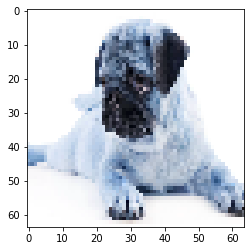

In [34]:
#This was example of failure but after retrain it got it
file = "Data/Dog_V_Cat/Internet/5.jpg"
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = (np.dot(w.T, X_img) + b)
print(Z)
A = sigmoid(-Z)
print(A)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image)